In [1]:
import pandas as pd 
import numpy as np

In [66]:
data = pd.read_excel('C:/Users/Innovation/Desktop/김동요/jupyter/Data/MA/챕터별 예제 파일/Chapter 16 Excel Files/conjoint.xls', sheet_name='New_Data')

In [67]:
data.head()

,디자인,브랜드,가격,인증,보증,순위
0,A,1,1.19,No,No,13
1,A,2,1.39,No,Yes,11
2,A,3,1.59,Yes,No,17
3,B,1,1.39,Yes,Yes,2
4,B,2,1.59,No,No,14


In [68]:
data['브랜드'] = data['브랜드'].astype('object')
data['가격'] = data['가격'].astype('object')

In [69]:
one_hot_data = pd.get_dummies(data[['디자인', '브랜드', '인증', '보증', '가격']])

C:\Users\Innovation\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [70]:
one_hot_data.head()

,디자인_A,디자인_B,디자인_C,브랜드_1,브랜드_2,브랜드_3,인증_No,인증_Yes,보증_No,보증_Yes,가격_1.19,가격_1.39,가격_1.59
0,1,0,0,1,0,0,1,0,1,0,1,0,0
1,1,0,0,0,1,0,1,0,0,1,0,1,0
2,1,0,0,0,0,1,0,1,1,0,0,0,1
3,0,1,0,1,0,0,0,1,0,1,0,1,0
4,0,1,0,0,1,0,1,0,1,0,0,0,1


In [71]:
one_hot_data.drop(columns=['디자인_C', '브랜드_3', '인증_No', '보증_No', '가격_1.59'], inplace=True)

In [72]:
one_hot_data

,디자인_A,디자인_B,브랜드_1,브랜드_2,인증_Yes,보증_Yes,가격_1.19,가격_1.39
0,1,0,1,0,0,0,1,0
1,1,0,0,1,0,1,0,1
2,1,0,0,0,1,0,0,0
3,0,1,1,0,1,1,0,1
4,0,1,0,1,0,0,0,0
5,0,1,0,0,0,0,1,0
6,0,0,1,0,0,1,0,0
7,0,0,0,1,1,0,1,0
8,0,0,0,0,0,0,0,1
9,1,0,1,0,1,0,0,0


In [73]:
data = pd.concat([data['순위'], one_hot_data], axis=1)

In [74]:
data.head()

,순위,디자인_A,디자인_B,브랜드_1,브랜드_2,인증_Yes,보증_Yes,가격_1.19,가격_1.39
0,13,1,0,1,0,0,0,1,0
1,11,1,0,0,1,0,1,0,1
2,17,1,0,0,0,1,0,0,0
3,2,0,1,1,0,1,1,0,1
4,14,0,1,0,1,0,0,0,0


In [75]:
data['순위'] = data.shape[0] + 1 - data['순위'] 

In [76]:
data.head()

,순위,디자인_A,디자인_B,브랜드_1,브랜드_2,인증_Yes,보증_Yes,가격_1.19,가격_1.39
0,6,1,0,1,0,0,0,1,0
1,8,1,0,0,1,0,1,0,1
2,2,1,0,0,0,1,0,0,0
3,17,0,1,1,0,1,1,0,1
4,5,0,1,0,1,0,0,0,0


In [77]:
import statsmodels.api as sm

In [78]:
x = data.drop(columns=['순위'], axis=1)
x = sm.add_constant(x, has_constant='add')
y = data['순위']
model = sm.OLS(y, x)
fit_model = model.fit()

In [79]:
fit_model.summary()

C:\Users\Innovation\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     순위   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     65.62
Date:                Thu, 19 May 2022   Prob (F-statistic):           4.49e-07
Time:                        22:27:08   Log-Likelihood:                -18.428
No. Observations:                  18   AIC:                             54.86
Df Residuals:                       9   BIC:                             62.87
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8333      0.635      7.611      0.000       3.397       6.270
디자인_A         -4.5000      0.550     -8.182      0.000      -5.744      -3.256
디자인_B          3.5000      0.550      6.364      0.000       2.256       4.744
브랜드_1         -1.5000      0.550     -2.727      0.023      -2.744      -0.256
브랜드_2         -2.0000      0.550     -3.637      0.005      -3.244      -0.756
인증_Yes         1.5000      0.476      3.149      0.012       0.423       2.577
보증_Yes         4.5000      0.476      9.448      0.000       3.423       5.577
가격_1.19        7.6667      0.550     13.940      0.000       6.423       8.911
가격_1.39        4.8333      0.550      8.788      0.000       3.589       6.077
==============================================================================
Omnibus:                        0.915   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.872
Skew:                          -0.409   Prob(JB):                        0.647
Kurtosis:                       2.298   Cond. No.                         5.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

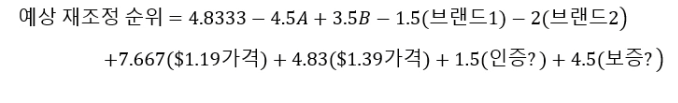
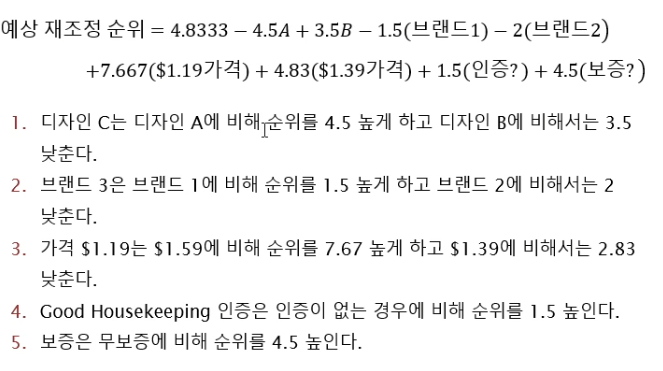

## 선호도 파악 가능
- 디자인 b > c  > a 
- 브랜드 3 > 1 > 2 
- 가격 1.19 > 1.39 > 1.59
- 인증 > 무 인증 
- 보증 > 무보증

In [80]:
fit_model.predict(x)

0      6.500000
1      7.666667
2      1.833333
3     17.666667
4      6.333333
5     16.000000
6      7.833333
7     12.000000
8      9.666667
9      0.333333
10    10.500000
11     5.166667
12    14.500000
13    12.666667
14    12.833333
15     8.166667
16     2.833333
17    18.500000
dtype: float64

## 가장 높은 순위의 계수와 가장 낮은 순위에 계수를 빼주면 된다
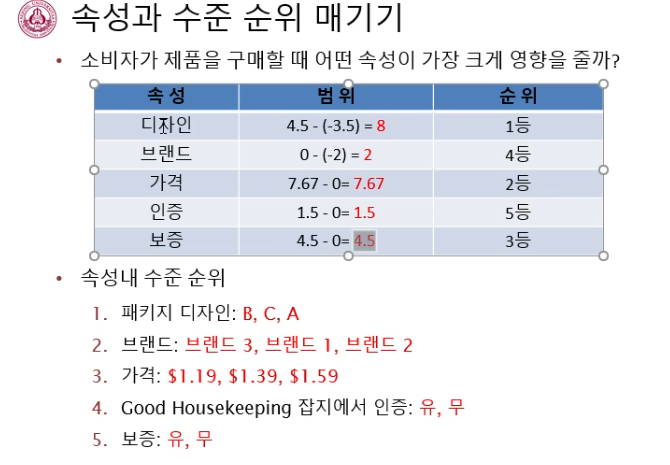